## We now move the architecture from last notebook to an interactive setting

# Careful: Don't re-run any cells in this notebook until you've read to the very end
The code in this notebook is interactive. If you rerun the plots, you loose the data.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.2.1'

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

### Setting up some data, try clicking on the plot

<IPython.core.display.Javascript object>


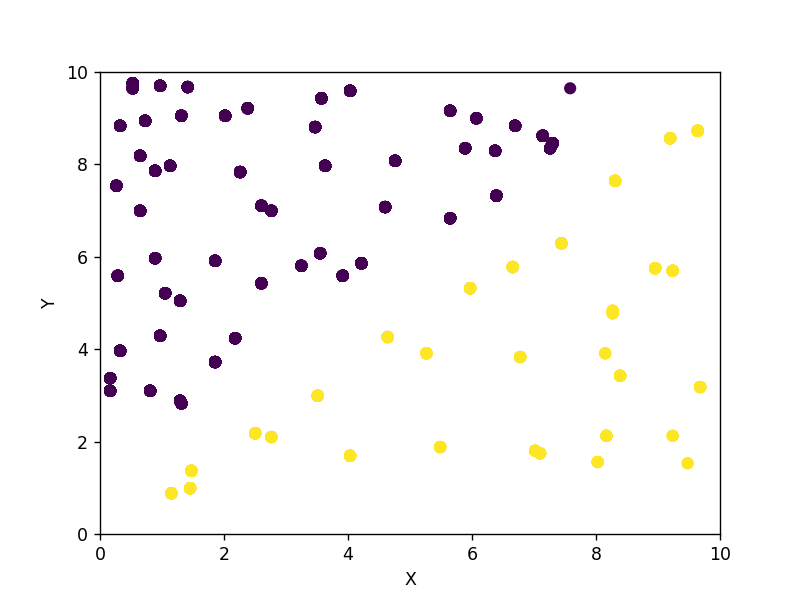

In [6]:
fig, ax = plt.subplots()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,10)
ax.set_ylim(0,10)

x = []
y = []
labels = []


def onclick(event):
    
    if event.xdata==None or event.ydata==None:
        return
    
    x.append(event.xdata)
    y.append(event.ydata)
    
    
    # different labels for different mouse buttons
    if event.button==1:
        label = 0
    else:
        label = 1
    labels.append(label)
    
    ax.scatter(x,y, c=labels)
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

In [7]:
train_x = np.array(x)
train_y = np.array(y)
train_labels = np.array(labels)

In [8]:
train_x.max()

9.679939516129032

### Setting up the network

In [9]:
dims = [10, 2]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

in_tensor = tf.placeholder(tf.float32, [None, dims[0]])
in_tensor

<tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>

In [10]:
tensor = in_tensor

for prev_dim, next_dim, activation in zip(dims[:-1], dims[1:], activations):
    W = tf.Variable(tf.truncated_normal([prev_dim, next_dim]))
    b = tf.Variable(tf.truncated_normal([next_dim]))
    
    tensor = tf.matmul(tensor, W) + b
    
    if activation=="relu":
        tensor = tf.nn.relu(tensor)
    if activation=="sigmoid":
        tensor = tf.nn.sigmoid(tensor)
    
tensor = tf.nn.softmax(tensor)
out_tensor = tensor
out_tensor

<tf.Tensor 'Softmax:0' shape=(?, 2) dtype=float32>

In [11]:
in_labels = tf.placeholder(tf.int32, [None, ])
oh_labels = tf.one_hot(in_labels, depth=dims[-1])

In [12]:
loss = tf.reduce_mean( tf.square(out_tensor - oh_labels))

In [13]:
lr = 1e-3
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

### Start the training

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
def extract_features(x, y, num_features=None):
    
    assert num_features>0
    
    features = np.zeros((len(x), num_features))
    features[:, 0]=x
    features[:, 1]=y
    features[:, 2]=0 
    features[:, 3]=0 
    features[:, 4]=0
    
    return features

In [16]:
num_samples = len(train_x)
batch_size = 2

def generate_batch():
    idx = np.random.choice(num_samples, batch_size, replace=False)

    x = train_x[idx]
    y = train_y[idx]
    labels = train_labels[idx]

    features = extract_features(x, y, num_features=dims[0])
    
    return features, labels

In [25]:
for i in range(100000):
    features, labels = generate_batch()
    sess.run(train_op, feed_dict={in_tensor:features, in_labels: labels})

In [26]:
range_x = (0, 10)
range_y = (0, 10)

res_x = 100
res_y = 100

x_coords = np.linspace(*range_x, res_x)
y_coords = np.linspace(*range_y, res_y)

In [27]:
mesh = np.meshgrid(x_coords, y_coords)

In [28]:
x_coords_flat = mesh[0].reshape(-1)
y_coords_flat = mesh[1].reshape(-1)

size_flat = x_coords_flat.shape[0]

In [29]:
img_flat = np.zeros((size_flat, 2))

assert size_flat % batch_size == 0

for i in range(size_flat//batch_size):
    batch_x = x_coords_flat[i*batch_size : (i+1)*batch_size]
    batch_y = y_coords_flat[i*batch_size : (i+1)*batch_size]
    batch_features = extract_features(batch_x, batch_y, num_features=dims[0])
    
    img_flat[i*batch_size: (i+1)*batch_size]= sess.run(out_tensor, feed_dict={in_tensor : batch_features})
    

In [30]:
img = img_flat.reshape((res_x, res_y, 2))

In [31]:
decision = img[:,:,1]>img[:,:,0]

decision = decision[::-1]

<IPython.core.display.Javascript object>


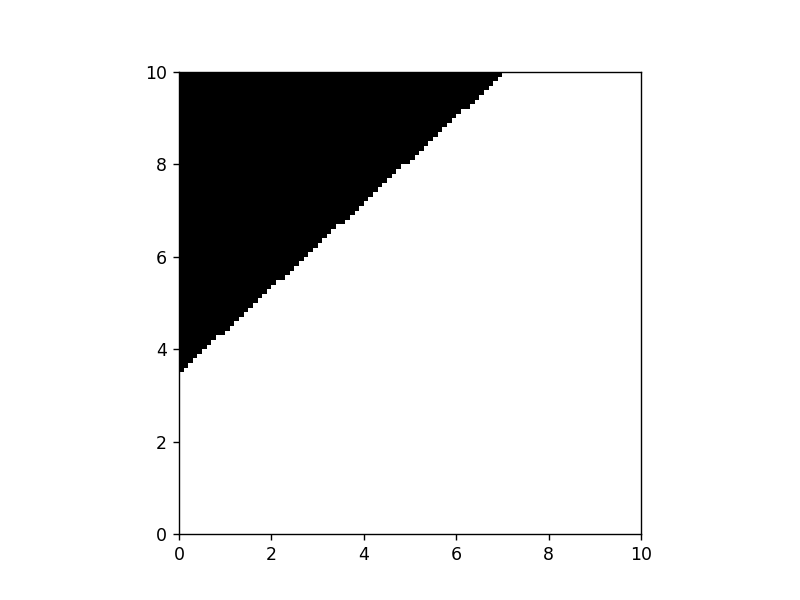

In [32]:
plt.figure()
plt.imshow(decision, cmap="gray", extent=[*range_x, *range_y])
plt.show()

## your turn

In theory, a multilayer perceptron should be able to classify arbitrary regions.
Try to increase the number of dimensions.
Then run the first plot again and click on it to create more complex classification regions. What can you classify ?